             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

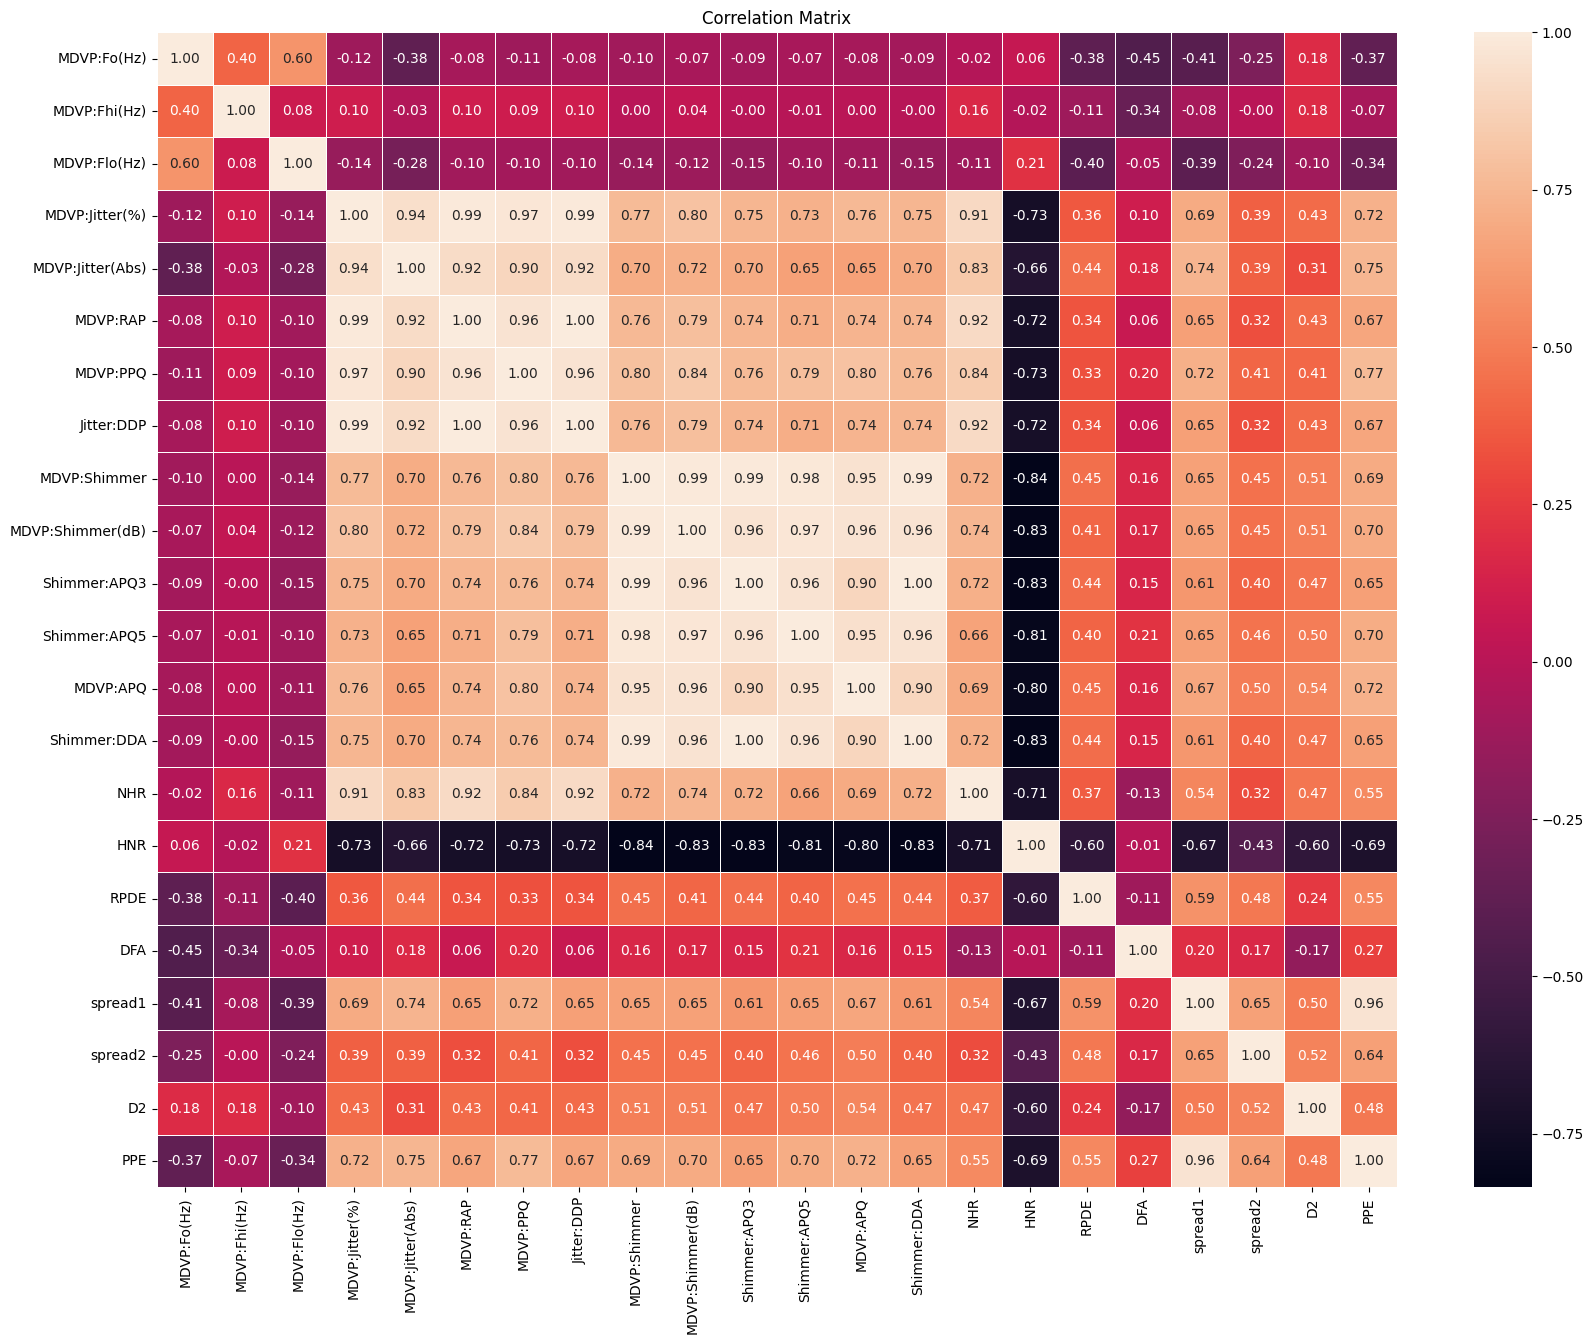

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE              

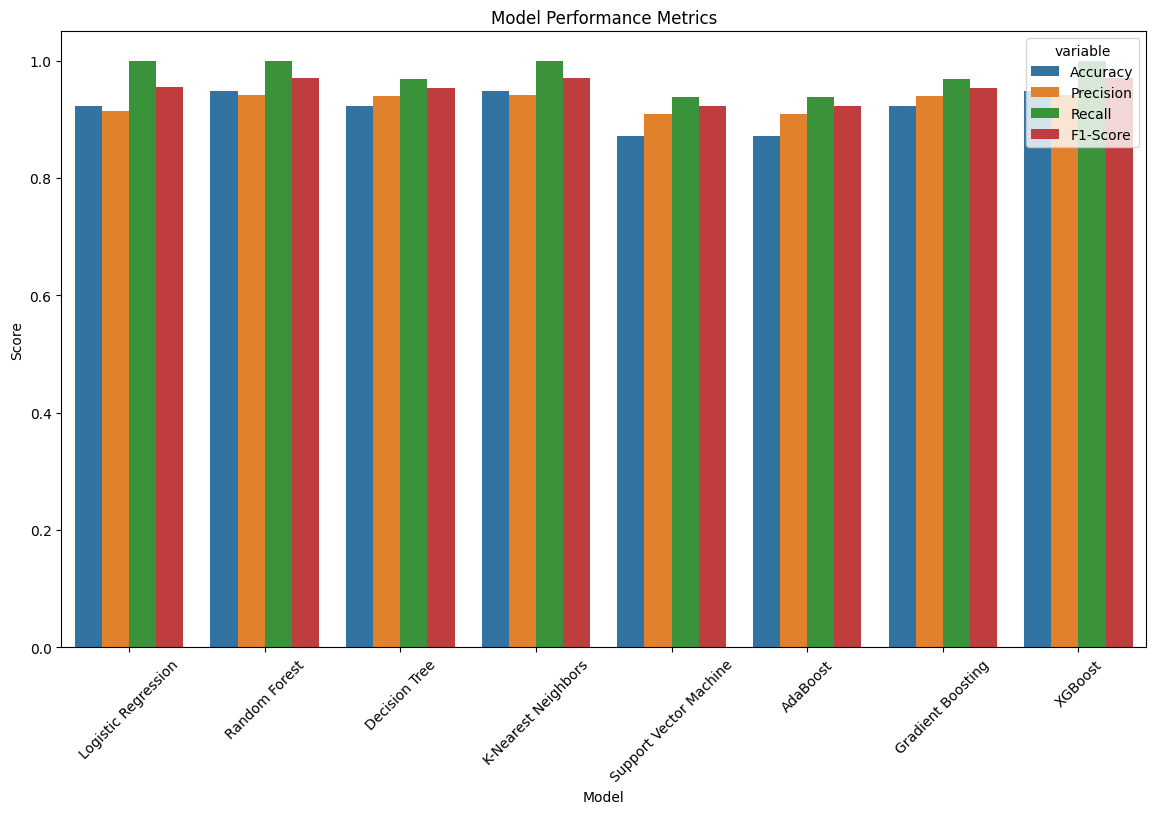

In [1]:
# 1. Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing Dataset

# Load the dataset
df = pd.read_csv('../datasets/parkinsons.csv')

# 3. Data Visualization

# View the first few rows of the data
print(df.head())

# Check the distribution of the target variable
print(df['status'].value_counts())

# Check for missing values
print(df.isna().sum())

# Define the feature columns
features = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 
    'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 
    'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 
    'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
]

# Ensure 'status' is of integer type
df['status'] = df['status'].astype(int)

# Correlation matrix
corr_matrix = df[features].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Data Preprocessing

# Features and target variable
X = df[features]
y = df['status']

# Check data types of features
print(X.dtypes)

# Check for missing values in features
print(X.isna().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Data Splitting

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# 6. Defining ML Models

# Define the models with specified parameters
models = [
    ('Logistic Regression', LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1, criterion='gini', random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=3, random_state=42))
]

# 7. Training models

# Initialize a list to store model performance metrics
model_metrics = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    model_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# 8. Evaluating model performance

# Create a DataFrame for all metrics
metrics_df = pd.DataFrame(model_metrics)

# Display the metrics DataFrame
print("Model Performance Metrics:")
print(metrics_df)

# Visualize the metrics
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='value', hue='variable', 
            data=pd.melt(metrics_df, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score']))
plt.xticks(rotation=45)
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

In [2]:
#---------------------------------------------------
# Random Forest has highest recall.
# Extracting the Random Forest

from joblib import dump

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the model to a file
dump(rf_model, '../models/parkinsons_disease_prediction_rf.sav')

['../models/parkinsons_disease_prediction_rf.sav']